In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#create the pivoted dataframe from each of the datasets to extract the features we need

cases_state = pd.read_csv('./data/cases_state.csv', index_col=0)
cases_state_pivoted = cases_state.pivot(index='date', columns='state', values='cases_new')

deaths_state = pd.read_csv('./data/deaths_state.csv')
deaths_state_pivoted = deaths_state.pivot(index='date', columns='state', values='deaths_new')

tests_state = pd.read_csv('./data/tests_state.csv')
tests_state_pivoted = tests_state.pivot(index='date', columns='state', values='total')

quarantine_state = pd.read_csv('./data/pkrc.csv')
quarantine_state_pivoted = quarantine_state.pivot(index='date', columns='state', values='admitted_covid')
discharge_quarantine_state_pivoted = quarantine_state.pivot(index='date', columns='state', values='discharge_covid')

icu_state = pd.read_csv('./data/icu.csv')
icu_state_pivoted = icu_state.pivot(index='date', columns='state', values='icu_covid')

hospital = pd.read_csv('./data/hospital.csv')
hospital_admitted_pivoted = hospital.pivot(index='date', columns='state', values='admitted_covid')
hospital_discharged_pivoted = hospital.pivot(index='date', columns='state', values='discharged_covid')

population_state = pd.read_csv('./data/population.csv', index_col=0)

In [3]:
#create a dataframe that only store the data of the states we need only

states_list = ['Pahang', 'Kedah', 'Johor', 'Selangor']
states = {}

for state in states_list:
    df = pd.DataFrame()
    df['cases'] = cases_state_pivoted[state]
    df['deaths'] = deaths_state_pivoted[state]
    df['tests'] = tests_state_pivoted[state]
    df['quarantine'] = quarantine_state_pivoted[state]
    df['discharge_quarantine'] = discharge_quarantine_state_pivoted[state]
    df['icu'] = icu_state_pivoted[state]
    df['hospital_admitted'] = hospital_admitted_pivoted[state]
    df['hospital_discharged'] = hospital_discharged_pivoted[state]
    df.fillna(0, inplace=True)
    states[state] = df

## Finding Best Features

Techniques Used:
1. Variance Threshold
2. SelectKBest with Mutual Info Regression
3. SelectKBest with Chi-Squared
4. Recursive Feature Elimination

In [4]:
#Streamlit

#We have used four methods to find the best features,which are the Variance Threshold,SelectKBest with Mutual Info Regression,
#SelectKBest with Chi-Squared and Recursive Feature Elimination.The way we decide which features to pick is be choosing the
#top four features that appeared the most in all of the methods.Hence,we can find the best features by using this way.

#Streamlit

In [5]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_regression, RFE, VarianceThreshold
from sklearn.linear_model import LinearRegression

#the function we use to find the best features

def get_best_features(df,display_scatter_plots = 0):
    X = df.drop(['cases'], axis=1)
    y = df['cases']

    selector = VarianceThreshold(3)
    selector.fit(df)
    variance_best = df.columns[selector.get_support()]

    selector = SelectKBest(mutual_info_regression, k=4)
    selector.fit(X, y)
    mutual_info_best = X.columns[selector.get_support()]

    selector = SelectKBest(chi2, k=4)
    selector.fit(X, y)
    chi2_best = X.columns[selector.get_support()]

    rfe_selector = RFE(LinearRegression(), n_features_to_select=4)
    rfe_selector.fit(X, y)
    rfe_best = X.columns[rfe_selector.get_support()]

    columns = df.columns
    columns_count = {}
    for column in columns:
        columns_count[column] = list(variance_best).count(column) + list(mutual_info_best).count(column) + list(chi2_best).count(column) + list(rfe_best).count(column)
    
    best_features = sorted(columns_count, key=columns_count.get)[-4:]
    
    
    if display_scatter_plots == 1:
        print("The best four features")
        display(best_features)
        print("")
        for num in range(len(best_features)):
            sns.scatterplot(x= best_features[num], y="cases", data=df)
            z = np.polyfit(df[best_features[num]], df['cases'], 1)
            p = np.poly1d(z)
            plt.plot(df[best_features[num]],p(df[best_features[num]]),"r--")
            plt.title('Scatter plot of ' + best_features[num] + ' and daily new cases')
            plt.xlabel(best_features[num])
            plt.ylabel("daily new cases")
            plt.show()

    if 'tests' not in best_features:
        best_features.append('tests')

    return best_features

The best four features


['quarantine', 'discharge_quarantine', 'icu', 'hospital_admitted']

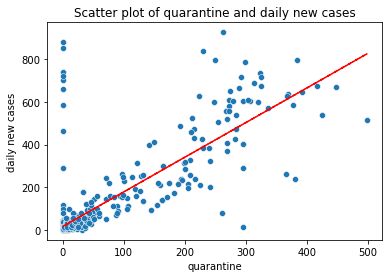

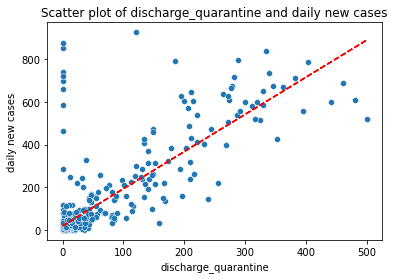

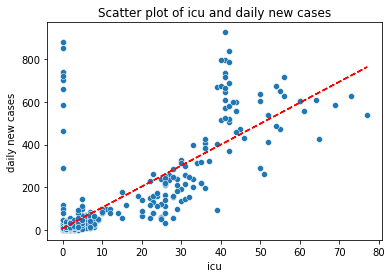

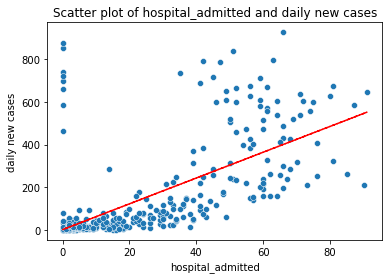

['quarantine', 'discharge_quarantine', 'icu', 'hospital_admitted', 'tests']

In [6]:
get_best_features(states['Pahang'],display_scatter_plots = 1)

#Streamlit

#Based on our result,we know that the four best features to daily new cases for Pahang are 'quarantine' , 'discharge_quarantine',
#'icu' and 'hospital_admitted'.For 'quarantine', 'discharge quaratine' and 'icu 'features,we can see a relatively strong linear positve 
#relationship with the daily new cases and for 'hospital_admitted' feature's relationship with the daily cases are showed to be more weaker
#and the plot in the graph is widely spread.For all the scatter plot also show that when the xlabel's value is near to zero ,
#there are few outlier,which indicated that the daily new cases is very high but the four features value are very low.
#Hence,we might need to do some research about what is the reasons causing these outlier in each graph.

#Streamlit

The best four features


['quarantine', 'discharge_quarantine', 'icu', 'hospital_admitted']

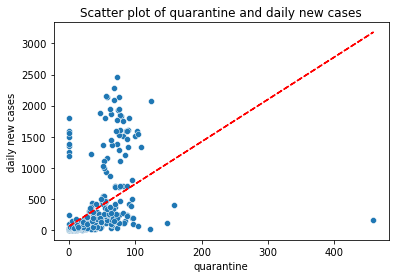

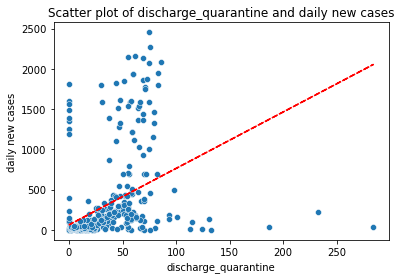

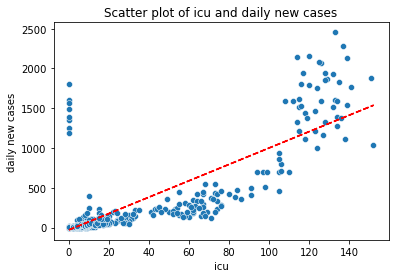

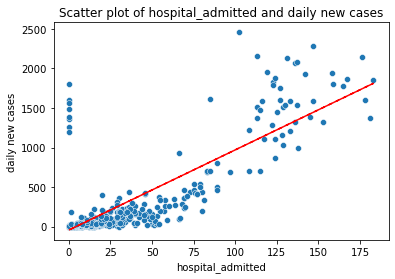

['quarantine', 'discharge_quarantine', 'icu', 'hospital_admitted', 'tests']

In [7]:
#Streamlit

#Based on our result,we know that the four best features to daily new cases for Kedah are 'quarantine' , 'discharge_quarantine',
#'icu' and 'hospital_admitted'.For 'quarantine' and 'discharge quaratine' have very similar pattern.However,it is a very weak 
#positive linear relationship and most of the plots are saturated at the lower left region in the graph.For 'icu' and
#'hospital_admitted' features show a relatively more strong and linear relationship with the daily new cases.Moreover,there are few
#extreme outlier in both of the bottom left region of the scatter plots.Hence,based on the
#four scatter plots,'icu' and 'hospital_admitted' features are considered as a better indicator than another two features.
#Moreover,For all the scatter plots,when the xlabel's value is near to zero also show the same problem happen in the Pahang cases,
#which is there are some outlier that have relatively high daily new cases.So,we can conclude that they might be caused by the
#same reason.

#Streamlit

get_best_features(states['Kedah'],display_scatter_plots = 1)

The best four features


['hospital_discharged', 'icu', 'discharge_quarantine', 'hospital_admitted']

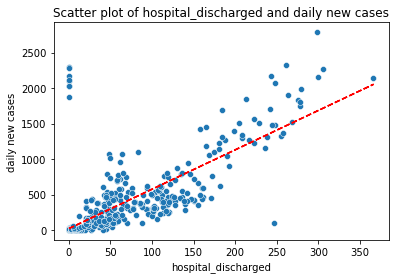

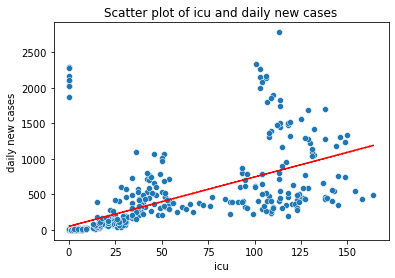

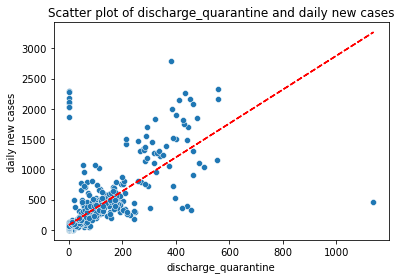

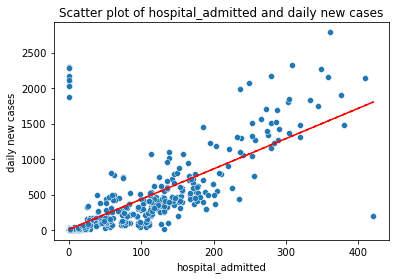

['hospital_discharged',
 'icu',
 'discharge_quarantine',
 'hospital_admitted',
 'tests']

In [8]:
get_best_features(states['Johor'],display_scatter_plots = 1)

#Streamlit

#Based on the graph
#Based on our result,we know that the four best features to daily new cases for Johor are 'hospital_discharged' , 
#'icu','discharge_quarantine' and 'hospital_admitted'.For 'hospital_discharged' and 'hospital_admitted' features' scatter
#plots we can see that both of them have a relatively strong linear postive relationship with the daily new cases.
#For 'icu' and 'discharge_quarantine',their plots in the graph is relatively wide spread and less saturated to the the trend line
#when compare to the other features.Hence,we can conclude that all four features also can be a good indicator for daily new cases
#but 'hospital_discharged' and 'hospital_admitted' features are considered as the better indicator with stronger relationship
#with daily new features based on their scatter plots.Furthermore,the same problem is happen to all this 4 features,which is 
#there are few outliers at the top left of each of the scatters plots and it is further proved that there is something that
#what is the reason that causing this problem.

#Streamlit

The best four features


['quarantine', 'icu', 'hospital_discharged', 'hospital_admitted']

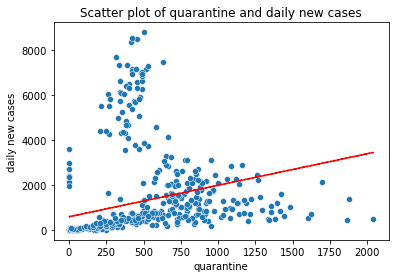

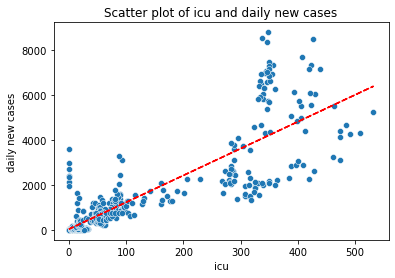

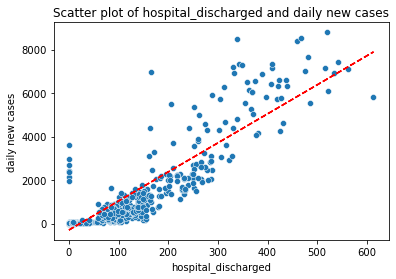

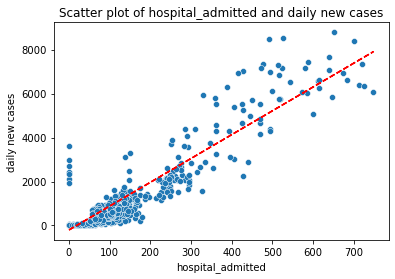

['quarantine', 'icu', 'hospital_discharged', 'hospital_admitted', 'tests']

In [9]:
get_best_features(states['Selangor'],display_scatter_plots = 1)
#Streamlit

#Based on the graph
#Based on our result,we know that the four best features to daily new cases for Selangor are 'quarantine' , 
#'icu','hospital_discharged' and 'hospital_admitted'.For 'hospital_discharged' and 'hospital_admitted' features' scatter
#plots we can see that both of them have a relatively strong linear postive relationship with the daily new cases.
#For 'quarantine' and 'icu',their plots in the graph is relatively wide spread and less saturated to the the trend line
#when compare to the other features.Hence,we can conclude that all four features also can be a good indicator for daily new cases
#but 'hospital_discharged' and 'hospital_admitted' features are considered as the better indicator with stronger relationship
#with daily new features based on their scatter plots.Lastly,for Selagor state also have the same issue,but the location of the group
#of data is around the medium left region rather than the top left region,it is caused by the relatively high daily new cases 
#of Selangor compare to other states.So,it further prove that there is somthings that causing this to be happen.

#Streamlit

## Modeling
Classification:
1. Support Vector Machine
2. Decision Tree
3. Random Forest Classifier

Regression:
1. Support Vector Machine
2. Linear Regression
3. Random Forest Regressor

In [10]:
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, mean_squared_error

In [11]:
#Streamlit

#The regression models that we decided to use are Support Vector Machine,Linear Refression and Random Forest Regressor.
#For the evalution method that we use for the regression models are score function and mean squared error.
#For the features we decide to use to train our models are based on the best four features we find for each states in question 3.
#Other than thats,we add another extra feature which is the 'test' feature into our training model.It is because based on
#our result,we find out that add added the 'test' feature,it will cause a great impact to our result and helping to 
#increase the accurancy of our models


#Streamlit

## Regression

In [12]:
def svm_regression(df, features):
    X = df[features]
    X = MinMaxScaler().fit_transform(X)
    y = df['cases']
    y = MinMaxScaler().fit_transform(y.values.reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

    svr_rbf = SVR(kernel='rbf', C=1e5, gamma=0.001)
    svr_rbf.fit(X_train, y_train)
    svr_rbf_pred = svr_rbf.predict(X_test)

    svr_rbf_score = svr_rbf.score(X_test, y_test)
    svr_rbf_mse = mean_squared_error(y_test, svr_rbf_pred)

    print('SVR RBF Score: ', svr_rbf_score)
    print('SVR RBF MSE: ', svr_rbf_mse)
    print('')


In [13]:
def linear_regression(df, features):
    X = df[features]
    X = MinMaxScaler().fit_transform(X)
    y = df['cases']
    y = MinMaxScaler().fit_transform(y.values.reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    lin_reg_pred = lin_reg.predict(X_test)

    lin_reg_score = lin_reg.score(X_test, y_test)
    lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)

    print('Linear Regression Score: ', lin_reg_score)
    print('Linear Regression MSE: ', lin_reg_mse)
    print('')

In [14]:
def random_forest_regressor(df, features):
    X = df[features]
    X = MinMaxScaler().fit_transform(X)
    y = df['cases']
    y = MinMaxScaler().fit_transform(y.values.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

    rf_reg = RandomForestRegressor(n_estimators=10, random_state=42)
    rf_reg.fit(X_train, y_train)
    rf_reg_pred = rf_reg.predict(X_test)

    rf_reg_score = rf_reg.score(X_test, y_test)
    rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)

    print('Random Forest Regressor Score: ', rf_reg_score)
    print('Random Forest Regressor MSE: ', rf_reg_mse)
    print('')

In [15]:
def print_result_for_regression_models(state) :
    svm_regression(states[state], get_best_features(states[state]))
    linear_regression(states[state], get_best_features(states[state]))
    random_forest_regressor(states[state], get_best_features(states[state]))

In [16]:
print_result_for_regression_models('Pahang')

SVR RBF Score:  0.7948344950950001
SVR RBF MSE:  0.011154766324718323

Linear Regression Score:  0.8269142563006484
Linear Regression MSE:  0.009410602557190896

Random Forest Regressor Score:  0.8907444756933715
Random Forest Regressor MSE:  0.005940179095356905



C:\Users\kaneu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-14-fb2daf1c86e5>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


In [17]:
print_result_for_regression_models('Kedah')

C:\Users\kaneu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR RBF Score:  0.7862379631213023
SVR RBF MSE:  0.00962118137462995

Linear Regression Score:  0.8602893287531803
Linear Regression MSE:  0.006288215286794469

Random Forest Regressor Score:  0.8891694734456308
Random Forest Regressor MSE:  0.004988353467226856



<ipython-input-14-fb2daf1c86e5>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


In [18]:
print_result_for_regression_models('Johor')

C:\Users\kaneu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR RBF Score:  0.787011454398647
SVR RBF MSE:  0.00860407997724242

Linear Regression Score:  0.8129115897087728
Linear Regression MSE:  0.007557794436390749

Random Forest Regressor Score:  0.9233327183118334
Random Forest Regressor MSE:  0.0030971215913057465



<ipython-input-14-fb2daf1c86e5>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


In [19]:
print_result_for_regression_models('Selangor')

C:\Users\kaneu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR RBF Score:  0.9387837774338715
SVR RBF MSE:  0.003941339794277976

Linear Regression Score:  0.9219057294006909
Linear Regression MSE:  0.005028014528104454

Random Forest Regressor Score:  0.9514170604768715
Random Forest Regressor MSE:  0.0031279596296334648



<ipython-input-14-fb2daf1c86e5>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


In [20]:

#Streamlit Conclude for the Regression model

#Based on the result we get from our Score Function, the Random Forest Regressor has the higest score compare to other method 
#in each of the states.
#For the result of the MSE,the Random Forest Regressor also score the best result by scoring the lowest error in all of states.
#Hence,we can conclude that the Random Forest Regressor is the best regression model for us to predict our results among all of
#the other regression model.

#Streamlit

## Classification

In [21]:
for state in states_list:
    states[state]['cases_binned'] = pd.cut(states[state]['cases'], bins=[-1, states[state]['cases'].max()/3, 2/3 * states[state]['cases'].max(), states[state]['cases'].max()], labels=['Low', 'Medium', 'High'])

In [22]:
def supportvectormachine_classification(df, features):
    X = df[features]
    X = MinMaxScaler().fit_transform(X)
    y = df['cases_binned']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

    svc = SVC(kernel='rbf', C=1e5, gamma=0.001)
    svc.fit(X_train, y_train)
    svc_pred = svc.predict(X_test)

    svc_score = svc.score(X_test, y_test)
    svc_f1_score = f1_score(y_test, svc_pred, average='weighted')

    print('SVC Score: ', svc_score)
    print('SVC F1 Score: ', svc_f1_score)
    print('')

In [23]:
def randomforest_classification(df, features):
    X = df[features]
    X = MinMaxScaler().fit_transform(X)
    y = df['cases_binned']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

    rf_clf = RandomForestClassifier(n_estimators=5, random_state=42)
    rf_clf.fit(X_train, y_train)
    rf_clf_pred = rf_clf.predict(X_test)

    rf_clf_score = rf_clf.score(X_test, y_test)
    rf_clf_f1_score = f1_score(y_test, rf_clf_pred, average='weighted')

    print('Random Forest Classification Score: ', rf_clf_score)
    print('Random Forest Classification F1 Score: ', rf_clf_f1_score)
    print('')

In [24]:
def logistic_regression(df, features):
    X = df[features]
    X = MinMaxScaler().fit_transform(X)
    y = df['cases_binned']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

    log_reg = LogisticRegression(random_state=42)
    log_reg.fit(X_train, y_train)
    log_reg_pred = log_reg.predict(X_test)

    log_reg_score = log_reg.score(X_test, y_test)
    log_reg_f1_score = f1_score(y_test, log_reg_pred, average='weighted')

    print('Logistic Regression Score: ', log_reg_score)
    print('Logistic Regression F1 Score: ', log_reg_f1_score)
    print('')

In [25]:
def print_result_for_classificaiton_models(state) :
    supportvectormachine_classification(states[state], get_best_features(states[state].drop(['cases_binned'], axis=1)))
    randomforest_classification(states[state], get_best_features(states[state].drop(['cases_binned'], axis=1)))
    logistic_regression(states[state], get_best_features(states[state].drop(['cases_binned'], axis=1)))

In [26]:
print_result_for_classificaiton_models('Pahang')

SVC Score:  0.925
SVC F1 Score:  0.9133928571428572

Random Forest Classification Score:  0.925
Random Forest Classification F1 Score:  0.9198842079329884

Logistic Regression Score:  0.925
Logistic Regression F1 Score:  0.9013963801989693



In [27]:
print_result_for_classificaiton_models('Kedah')

SVC Score:  0.9333333333333333
SVC F1 Score:  0.9319245082402977

Random Forest Classification Score:  0.9083333333333333
Random Forest Classification F1 Score:  0.9102662783440815

Logistic Regression Score:  0.9333333333333333
Logistic Regression F1 Score:  0.9263273576481903



In [28]:
print_result_for_classificaiton_models('Johor')

SVC Score:  0.975
SVC F1 Score:  0.9757539682539682

Random Forest Classification Score:  0.9583333333333334
Random Forest Classification F1 Score:  0.9598412698412698

Logistic Regression Score:  0.95
Logistic Regression F1 Score:  0.9310077519379846



In [29]:
print_result_for_classificaiton_models('Selangor')

SVC Score:  0.9583333333333334
SVC F1 Score:  0.9543532338308457

Random Forest Classification Score:  0.9416666666666667
Random Forest Classification F1 Score:  0.9361442786069651

Logistic Regression Score:  0.925
Logistic Regression F1 Score:  0.921589911405539



In [ ]:

#Streamlit Conclude for the classifcaiton model

#Based our the result for Pahang,we will see that all 3 method all get the same result for the Score Function but there are
#some slightly different for the F1 score,for the F1 score,the SVC model score the best.So,we can concludle that the SVC
#model is best fit for Pahang to predict the cases.
#Next,for Kedah,both the Logistic Regression model and the SVC model also score the highest result in the Score Function but when
#come to the F1 Score result,the SVC model will score slightly better than the Logistic Regression.In conclusion,for Kedah,SVC
#model also is the best model in predicting the cases.
#Moreover,for Johor and selangor,the SVC model also score the highest result in the Score Function and F1 Score.
#Hence,based on our result we can conclude that the SVC model has the best overall outcome compare to other models.

#Streamlit

In [ ]:
#Streamlit Conclude for the both model

#To conclude for both classification model and regression model,we can check on their Score Function result.It is because 
#for both type of models we also used this evalution metric.When we are trying to compare the SVC classification model and the
#Random Forest Regressor,which both also score the best overall result in their own sector,the SVC classification is also score
#around 1 to 5 percent better than the Random Forest Regressor.In conclusion,among all the models we used,the SVC classification
#model is the best model to predict the daily cases.

#Streamlit